# Cải thiện hình ảnh qua Lọc miền không gian (Image Enhancement Spatial Domain Filtering)

In [54]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

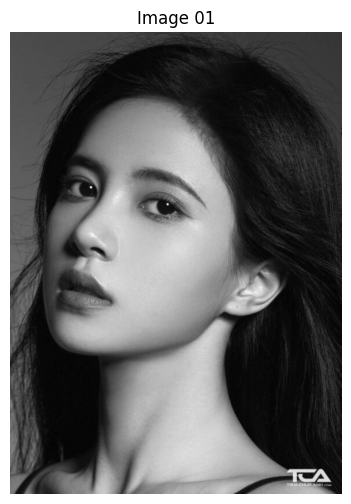

In [55]:
# Đường dẫn đến file ảnh
image_path = '/home/ubuntu_qa/codevs/Computer vision/Kien～先生/Cloud/Image01.jpg'

# Kiểm tra xem file có tồn tại hay không
if not os.path.exists(image_path):
    print(f"Lỗi: Không tìm thấy file tại đường dẫn {image_path}")
else:
    # Đọc ảnh gốc ở dạng grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Kiểm tra xem ảnh có được đọc thành công hay không
    if image is None:
        print("Lỗi: Không thể đọc được ảnh. Vui lòng kiểm tra file.")
    else:
        # Chuyển ảnh sang RGB để hiển thị với matplotlib
        image_rgb = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

        # Hiển thị ảnh
        plt.figure(figsize=(8, 6))
        plt.imshow(image_rgb)
        plt.title('Image 01')
        plt.axis('off')
        plt.show()

Bộ lọc trung bình (Averaging Filter): Làm mịn hình ảnh bằng cách lấy trung bình các giá trị xung quanh mỗi pixel.

In [56]:
# Áp dụng bộ lọc trung bình
def average_filter(image, kernel_size):
    kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size * kernel_size)
    filtered_image = cv2.filter2D(image, -1, kernel)
    return filtered_image

average_image = average_filter(image, kernel_size=5)

Bộ lọc Gaussian (Gaussian Filter): Làm mịn hình ảnh và làm giảm nhiễu, giữ lại chi tiết mịn màng.

In [57]:
# Áp dụng bộ lọc Gaussian
def gaussian_filter(image, kernel_size, sigma):
    kernel = cv2.getGaussianKernel(kernel_size, sigma)
    filtered_image = cv2.filter2D(image, -1, kernel @ kernel.T)
    return filtered_image

gaussian_image = gaussian_filter(image, kernel_size=5, sigma=1)

Bộ lọc trung vị (Median Filter): Loại bỏ nhiễu salt-and-pepper trong hình ảnh bằng cách thay thế giá trị của một pixel với giá trị trung vị của các pixel xung quanh nó.

In [58]:
# Áp dụng bộ lọc trung vị
def median_filter(image, kernel_size):
    filtered_image = cv2.medianBlur(image, kernel_size)
    return filtered_image

median_image = median_filter(image, kernel_size=5)

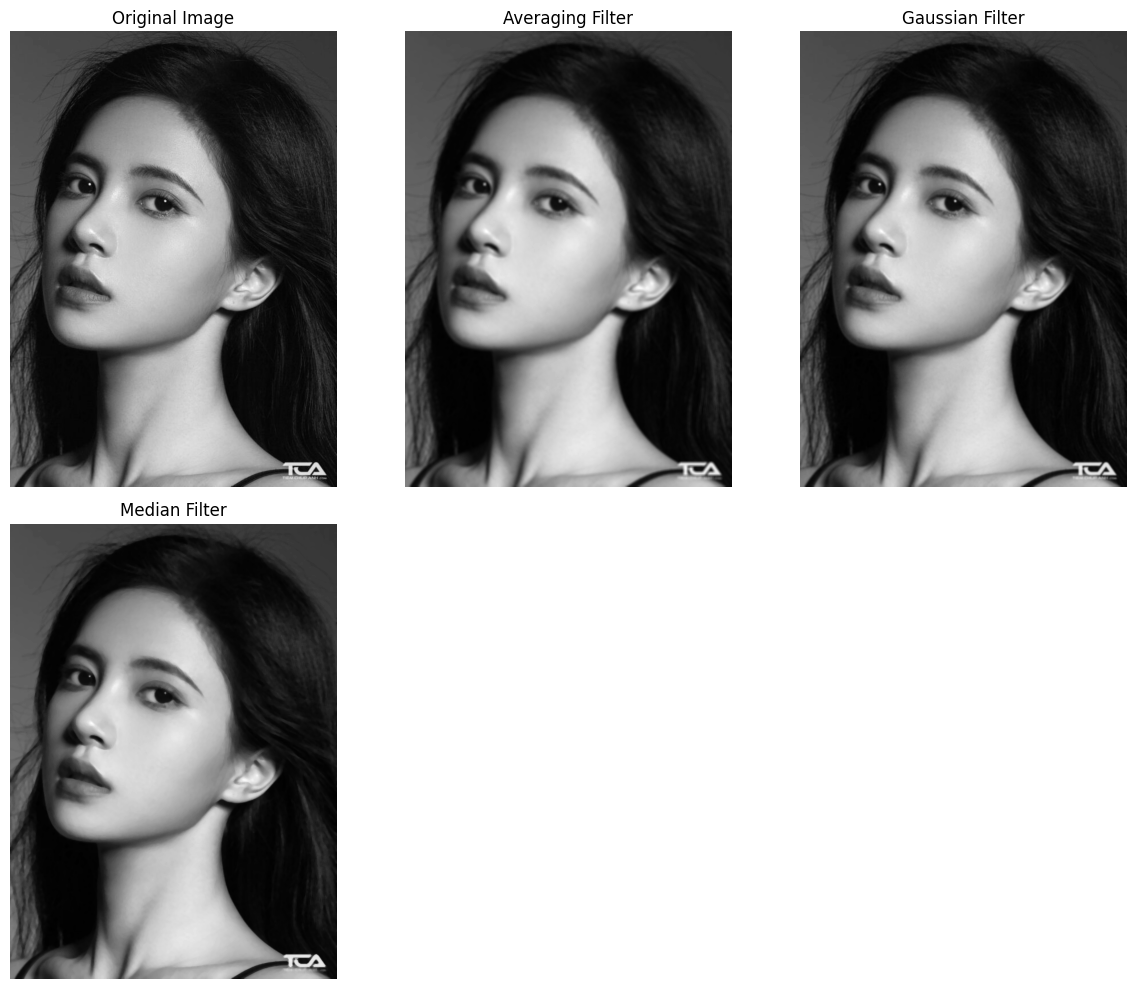

In [59]:
# Vẽ các ảnh gốc và đã qua xử lý
plt.figure(figsize=(12, 10))

plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(average_image, cmap='gray')
plt.title('Averaging Filter')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(gaussian_image, cmap='gray')
plt.title('Gaussian Filter')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(median_image, cmap='gray')
plt.title('Median Filter')
plt.axis('off')

plt.tight_layout()
plt.show()

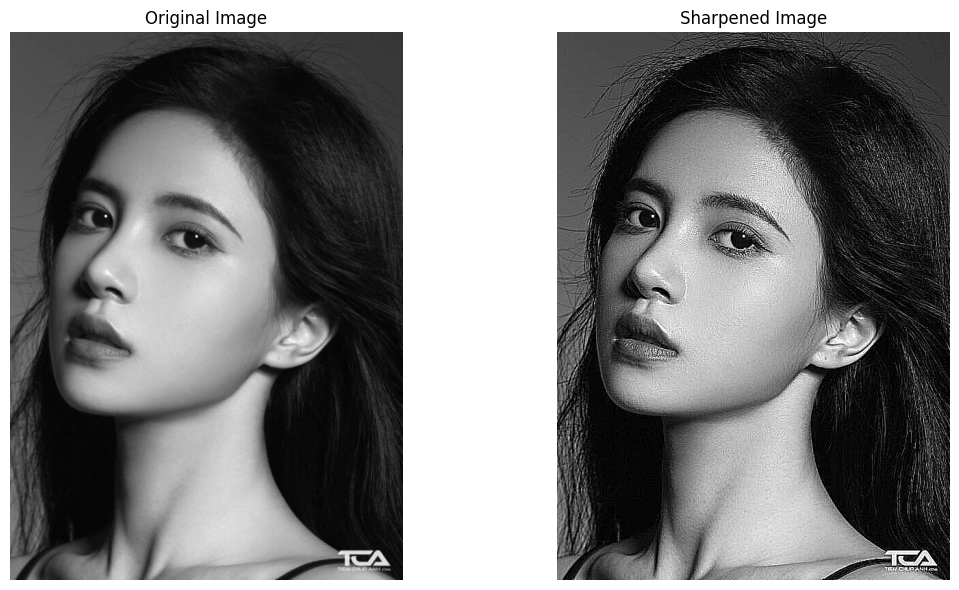

In [60]:
def sharpen_filter(image, alpha=1.5):
    """
    Áp dụng bộ lọc tăng cường độ sắc nét.
    """
    # Kernel cho bộ lọc tăng cường độ sắc nét
    kernel_sharpen = np.array([[-1, -1, -1],
                               [-1,  9, -1],
                               [-1, -1, -1]])

    # Áp dụng bộ lọc với nhân kernel_sharpen
    sharpened_image = cv2.filter2D(image, -1, kernel_sharpen)
    
    return sharpened_image


# Áp dụng bộ lọc tăng cường độ sắc nét
sharpened_image = sharpen_filter(image)

# Vẽ kết quả
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Sharpened Image')
plt.axis('off')

plt.tight_layout()
plt.show()


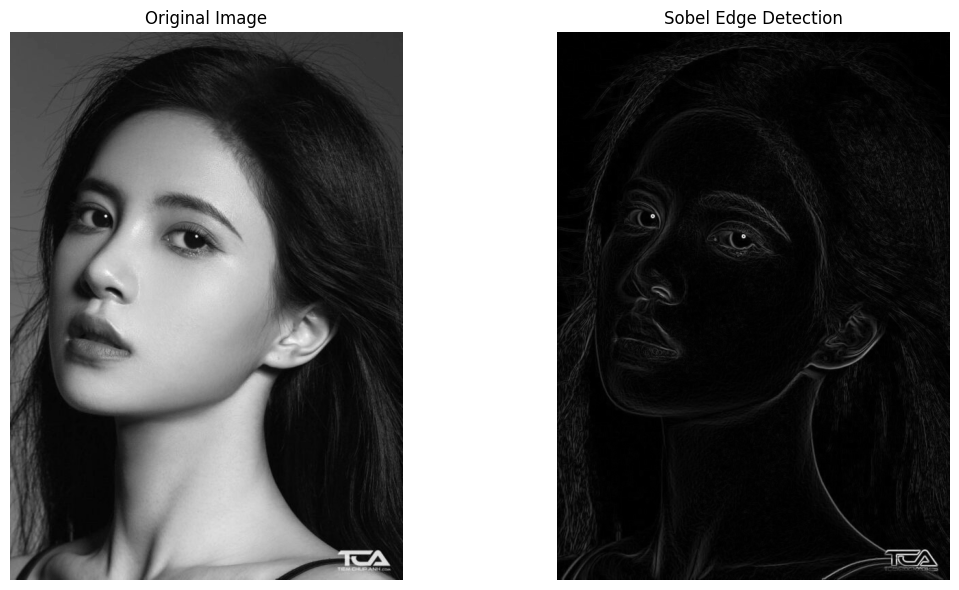

In [61]:
def edge_detection_sobel(image):
    """
    Phát hiện biên bằng cách sử dụng bộ lọc Sobel.
    """
    # Tính toán đạo hàm theo trục x và trục y
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

    # Tính giá trị gradient magnitude
    sobel_edge = np.sqrt(sobel_x**2 + sobel_y**2)

    return sobel_edge

# Áp dụng bộ lọc Sobel
edges_sobel = edge_detection_sobel(image)

# Vẽ kết quả
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges_sobel, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')

plt.tight_layout()
plt.show()

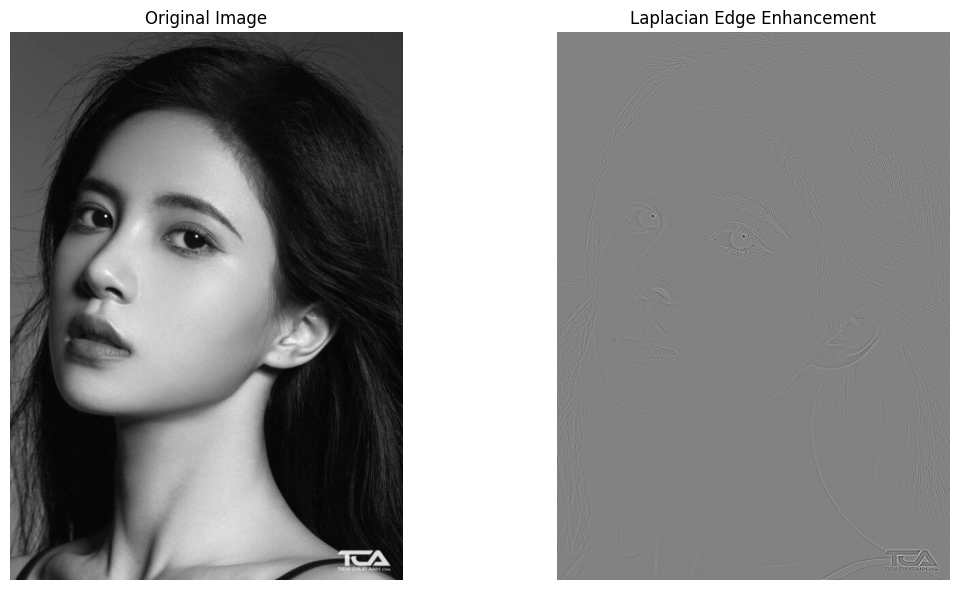

In [62]:
def laplacian_filter(image):
    """
    Tăng cường chi tiết hình ảnh bằng bộ lọc Laplacian.
    """
    laplacian = cv2.Laplacian(image, cv2.CV_64F)

    return laplacian

# Áp dụng bộ lọc Laplacian
laplacian_enhanced = laplacian_filter(image)

# Vẽ kết quả
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(laplacian_enhanced, cmap='gray')
plt.title('Laplacian Edge Enhancement')
plt.axis('off')

plt.tight_layout()
plt.show()


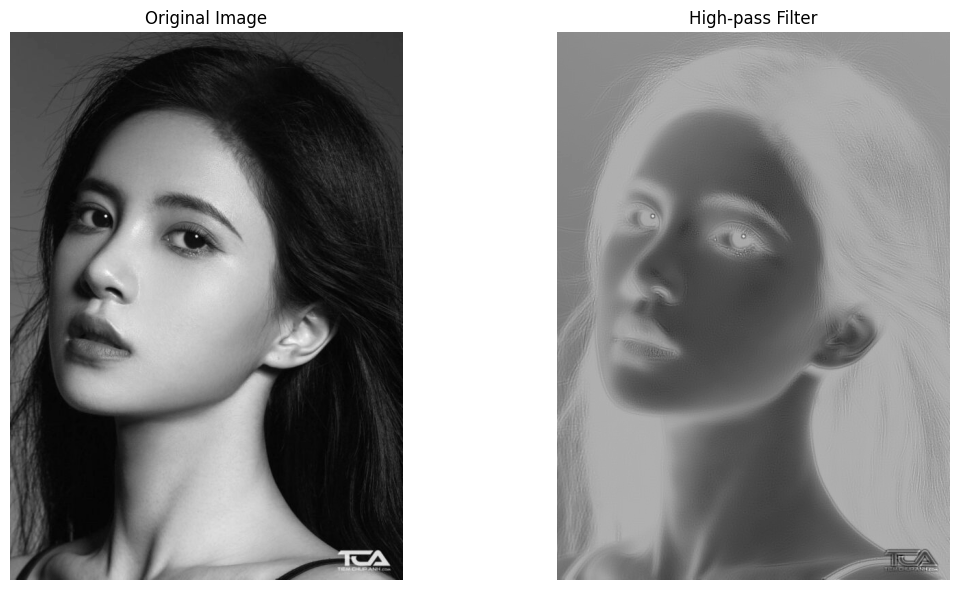

In [63]:
def high_pass_filter(image, alpha=1.0):
    """
    Tăng cường chi tiết hình ảnh bằng bộ lọc High-pass.
    """
    # Chuyển đổi ảnh đầu vào thành kiểu float
    image = image.astype(np.float32)

    # Tính giá trị trung bình của các pixel lân cận
    average_image = cv2.blur(image, (5, 5))

    # Tăng cường chi tiết
    high_pass_image = cv2.subtract(image, alpha * average_image)

    return high_pass_image


# Áp dụng bộ lọc High-pass
high_pass_enhanced = high_pass_filter(image, alpha=1.5)

# Vẽ kết quả
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(high_pass_enhanced, cmap='gray')
plt.title('High-pass Filter')
plt.axis('off')

plt.tight_layout()
plt.show()



So sánh các bộ lọc dựa trên histogram

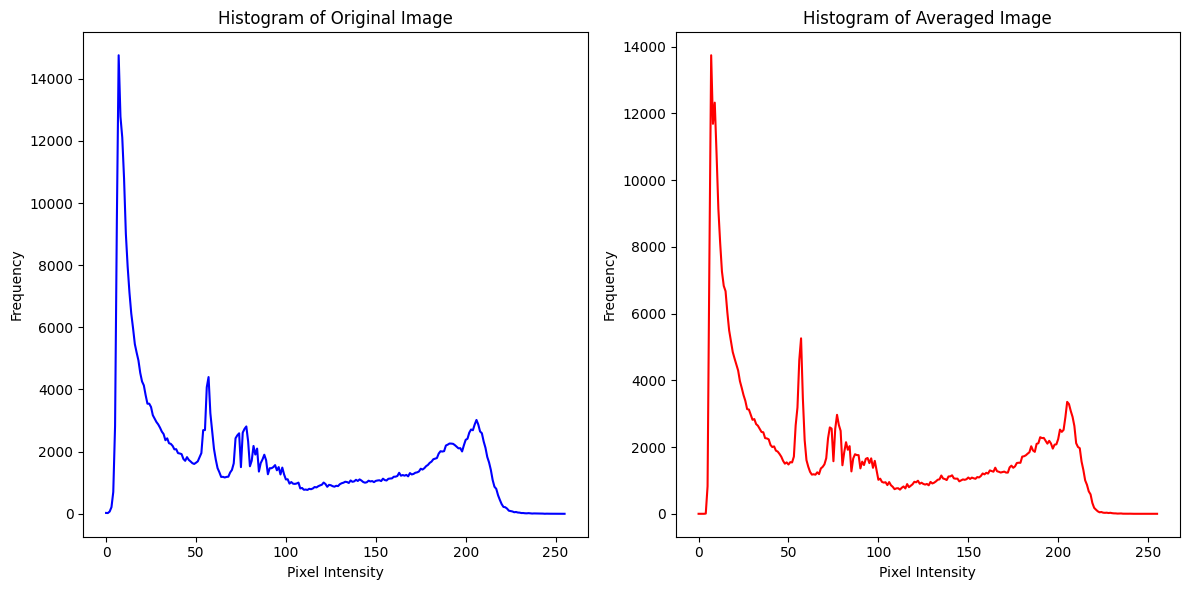

In [64]:
# Áp dụng bộ lọc trung bình
average_image = cv2.blur(image, (5, 5))

# Tính toán histogram của ảnh gốc và ảnh đã qua xử lý
hist_original, bins_original = np.histogram(image.flatten(), bins=256, range=[0, 256])
hist_average, bins_average = np.histogram(average_image.flatten(), bins=256, range=[0, 256])

# Vẽ histogram so sánh
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(hist_original, color='blue')
plt.title('Histogram of Original Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.plot(hist_average, color='red')
plt.title('Histogram of Averaged Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

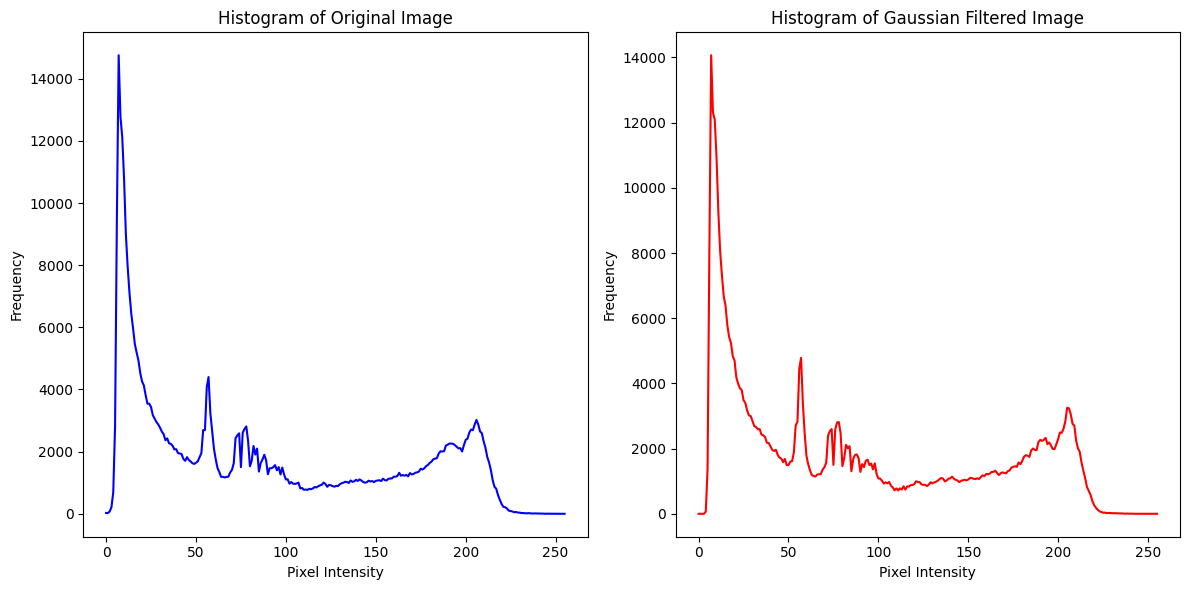

In [65]:
# Áp dụng bộ lọc Gaussian
gaussian_image = cv2.GaussianBlur(image, (5, 5), 1)

# Tính toán histogram của ảnh gốc và ảnh đã qua xử lý
hist_original, bins_original = np.histogram(image.flatten(), bins=256, range=[0, 256])
hist_gaussian, bins_gaussian = np.histogram(gaussian_image.flatten(), bins=256, range=[0, 256])

# Vẽ histogram so sánh
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(hist_original, color='blue')
plt.title('Histogram of Original Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.plot(hist_gaussian, color='red')
plt.title('Histogram of Gaussian Filtered Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


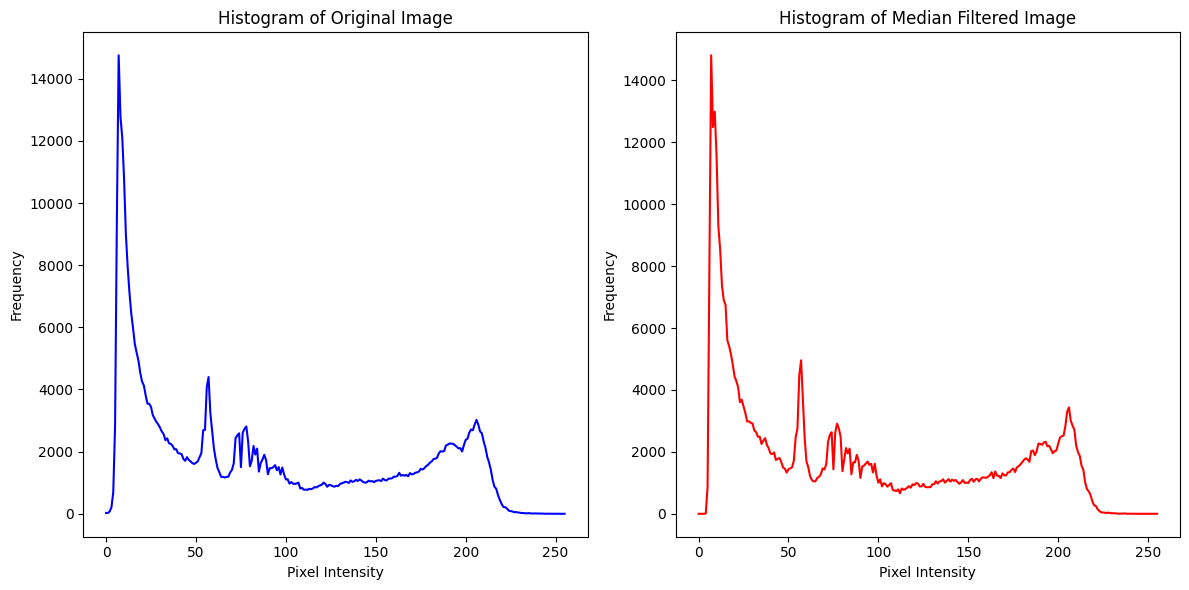

In [66]:
# Áp dụng bộ lọc trung vị
median_image = cv2.medianBlur(image, 5)

# Tính toán histogram của ảnh gốc và ảnh đã qua xử lý
hist_original, bins_original = np.histogram(image.flatten(), bins=256, range=[0, 256])
hist_median, bins_median = np.histogram(median_image.flatten(), bins=256, range=[0, 256])

# Vẽ histogram so sánh
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(hist_original, color='blue')
plt.title('Histogram of Original Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.plot(hist_median, color='red')
plt.title('Histogram of Median Filtered Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

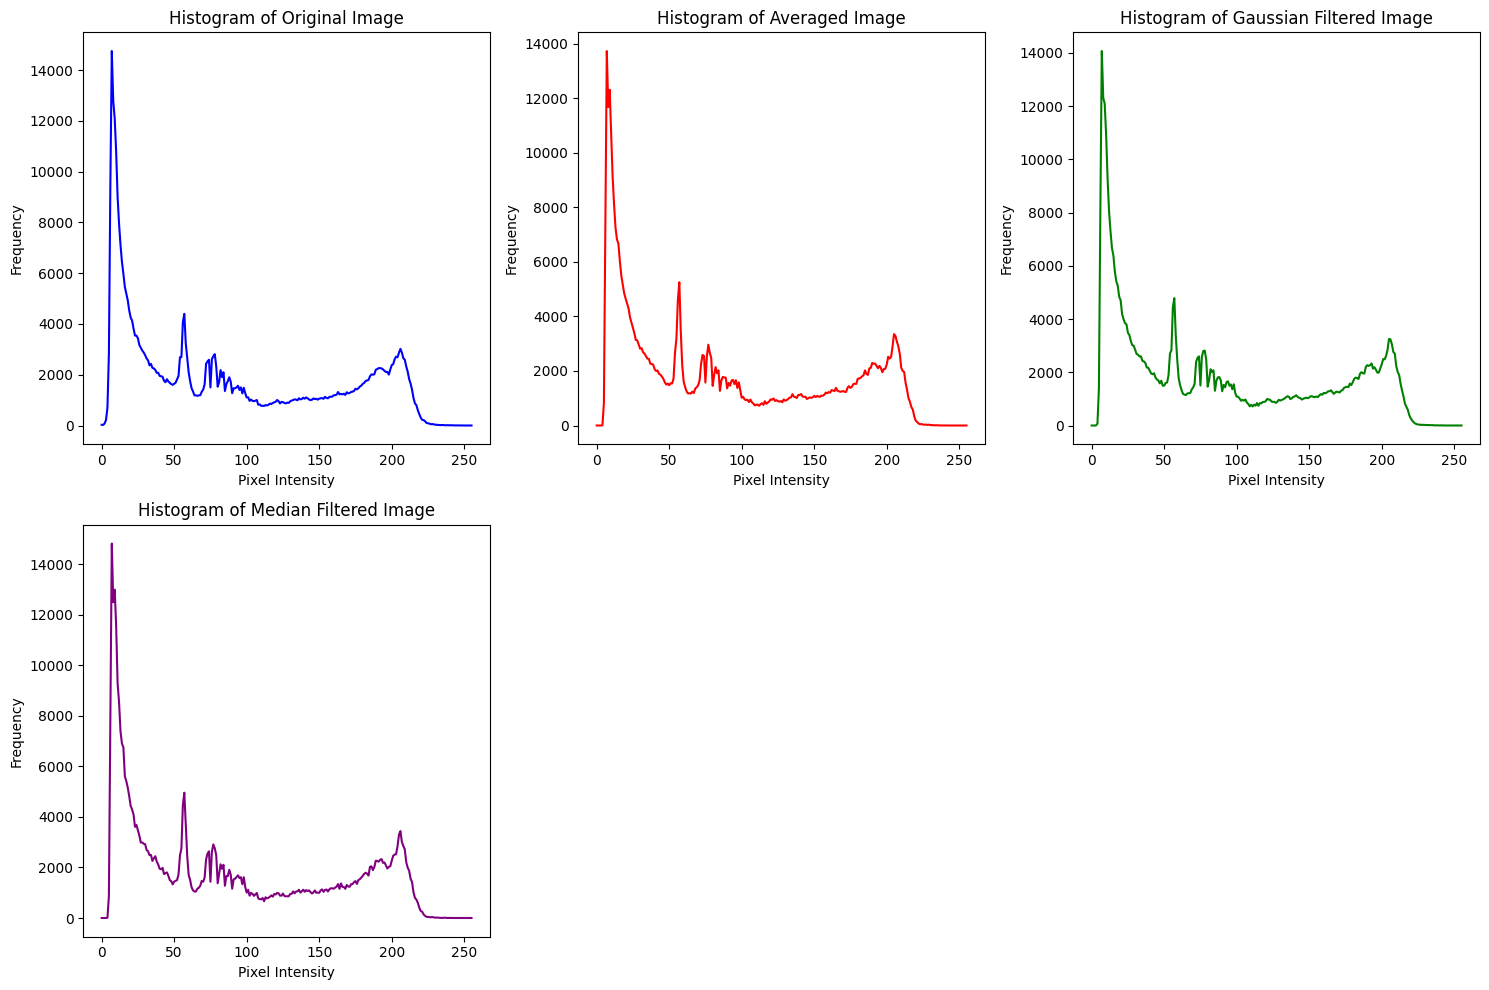

In [67]:
# Áp dụng các bộ lọc
average_image = cv2.blur(image, (5, 5))
gaussian_image = cv2.GaussianBlur(image, (5, 5), 1)
median_image = cv2.medianBlur(image, 5)

# Tính toán histogram của ảnh gốc và các ảnh đã qua xử lý
hist_original, bins_original = np.histogram(image.flatten(), bins=256, range=[0, 256])
hist_average, bins_average = np.histogram(average_image.flatten(), bins=256, range=[0, 256])
hist_gaussian, bins_gaussian = np.histogram(gaussian_image.flatten(), bins=256, range=[0, 256])
hist_median, bins_median = np.histogram(median_image.flatten(), bins=256, range=[0, 256])

# Vẽ histogram so sánh
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.plot(hist_original, color='blue')
plt.title('Histogram of Original Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(2, 3, 2)
plt.plot(hist_average, color='red')
plt.title('Histogram of Averaged Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(2, 3, 3)
plt.plot(hist_gaussian, color='green')
plt.title('Histogram of Gaussian Filtered Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(2, 3, 4)
plt.plot(hist_median, color='purple')
plt.title('Histogram of Median Filtered Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()